In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  #to set everthing default

In [2]:
#importing train data

train_data = pd.read_excel(r"Data_Train.xlsx")
pd.set_option("display.max_columns",None)   
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(10683, 11)

Only the dependent feature is integer, all the independent features are in object

In [4]:
#checking null values

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10682, 11)

# Exploratory Data Analysis

In [8]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


Having many categorical values. so it is necessary to clean those. Frist start with Date_of_Journey from object datatype to timestamp so as to use this column properly for prediction.

In [9]:
#extracting day and month from Date_of_Journey

train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [10]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [11]:
#Now we can drop the Date_of_Journey column as it is of no use. Because we converted that columns into integers.
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)
train_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [12]:
#similarly we can extract hour and minutes from departure time(Dep_Time)

train_data['dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['dep_minutes'] = pd.to_datetime(train_data.Dep_Time).dt.minute


In [13]:
#Drop the Dep_time column as it is of no use

train_data.drop(['Dep_Time'],axis=1,inplace=True)
train_data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [14]:
#similarly we can extract hour and minutes from the Arrival_Time

train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [15]:
#drop the Arrival_Time column as it is of no use

train_data.drop(['Arrival_Time'], axis=1,inplace=True)
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [16]:
 #extracting hours and minutes from duration manually, because it have ha nd m

duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:     # if duration contains only one hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() +' 0m'  #adds 0 min
        else:
            duration[i] = '0h '+ duration[i]   #adds 0 hours
            
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))   #extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))


In [17]:
train_data['Duration_hours']= duration_hours
train_data['Duration_mins'] = duration_mins
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [18]:
#dropping duration table

train_data.drop(['Duration'],axis=1,inplace=True)

## Handling categorical data

Two types of encoding:

1. nominal data -> arrangement not considered 
                    -> onehot encoder is used
2. ordinal data -> arrangment based on rank
                  -> label encoder is used

In [19]:
#step into airline

train_data['Airline'].value_counts()    #onehot encoding

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

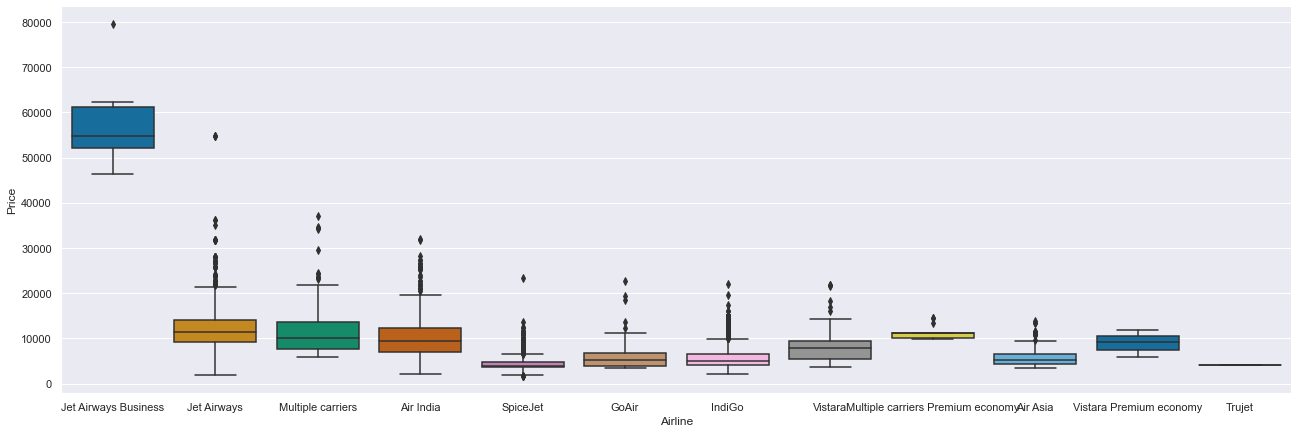

In [20]:
#Airline vs price

sns.catplot(y='Price',x='Airline', data=train_data.sort_values("Price",ascending=False),kind="box",palette='colorblind',height=6,aspect=3)

From above observations, it is clear that <font color='#6a449c'>Jet Airways Business</font> has a highest price

Apart from that, all other having almost similar median

In [21]:
#performing OneHot Encoding

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [22]:
#steping into source

train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

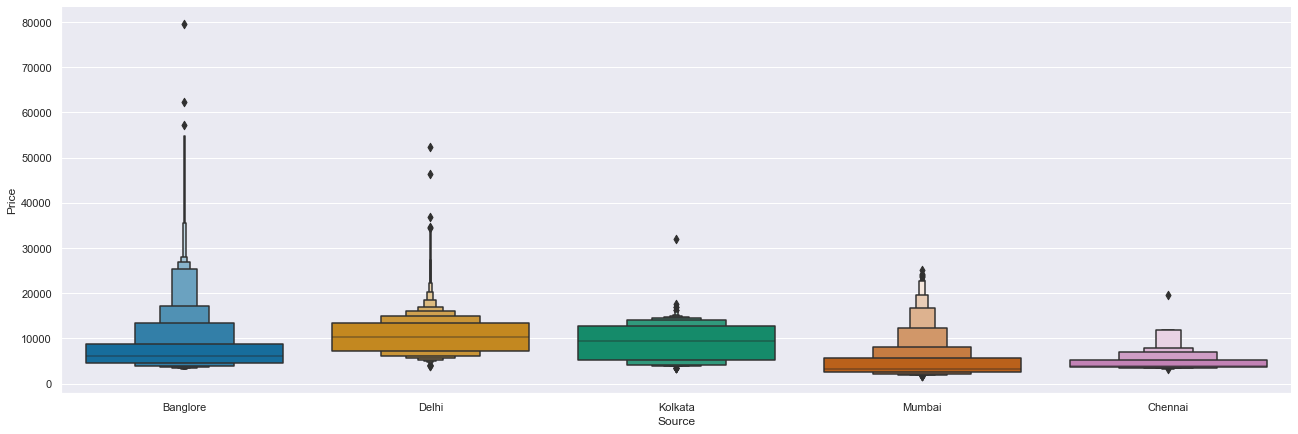

In [23]:
#plotting source vs price

sns.catplot(x='Source', y='Price',data= train_data.sort_values('Price',ascending=False),kind='boxen',palette="colorblind",height=6,aspect=3)

From observation, some of the outliers are in bangalore. Apart from that all are having atmost same median

In [24]:
#performing onehot encoding in source

source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head(6)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [25]:
#stepping into destination

train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

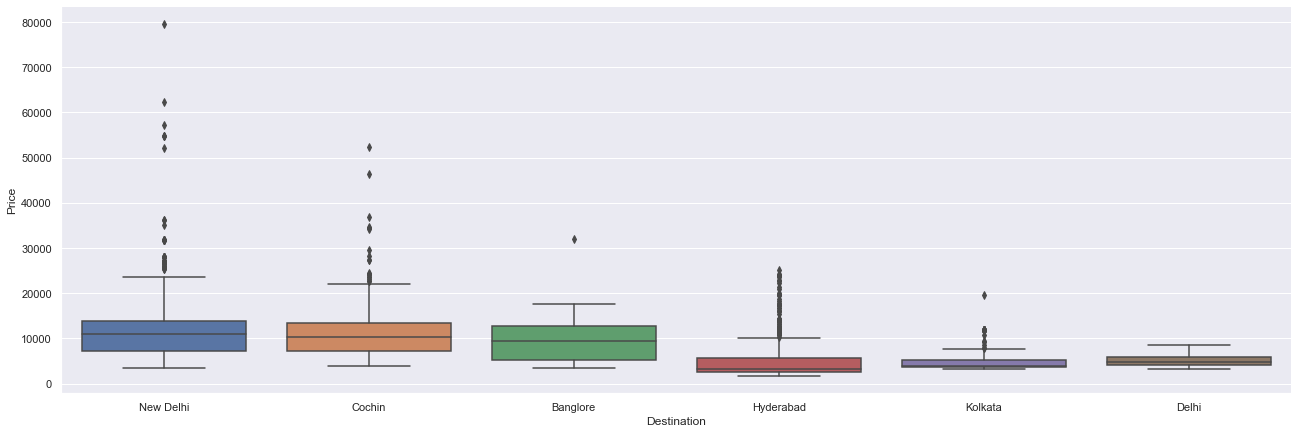

In [26]:
#plotting Destination vs price

sns.catplot(x="Destination", y = 'Price',data=train_data.sort_values('Price',ascending=False),kind='box',height=6,aspect=3 )

In [27]:
#performing one hot encoding in destination

destination = train_data[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [28]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [29]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

From above, it is clear that 80% of data in Additional_Info contains No info

In [30]:
#stepping down in to route
#Route and Total_Stops are related to each other 
#So we can drop additional_info and Route columns

train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0


In [31]:
#stepping down into Total_Stops

train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
#no of stops and price are directly proportional
#In this we have ordinal categorical type we perform LabelEncoder

train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [33]:
# data = train_data['Total_Stops']
# labels= train_data['Price']
# colors = sns.color_palette('pastel')[0:5]
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()

In [34]:
#concatenate data frames -> train_data + Airline + Source +Destination

data_train = pd.concat([train_data, Airline, source, destination],axis=1)
data_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
#drop airline, source, Destination as those are already dupicated

data_train.drop(['Airline','Source','Destination'],axis=1, inplace = True)


In [36]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data_train.shape

(10682, 30)

## Test Dataset

In [38]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
#preprocessing as same as train_data set

print("Test data Info")
print('-'*75)
print(test_data.info())

print()
print()

print("Null Values: ")
print('-'*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

print()
print()

#Exploratory Data Analysis

#date of journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#Dep_time

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

#Arrival_Time

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

#duration

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extr
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

#Handling categorical data
#Airline

Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

#Source
Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

#Destination

Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print("After EDA and Handling categorical data:  ")
print('-'*65)
print(data_test.head(4))

print()
print("Shape of test data: ")
print(data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values: 
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         


# Feature selection


In [40]:
data_train.shape

(10682, 30)

In [41]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_minutes', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [48]:
X=data_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'dep_hour',
       'dep_minutes', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_minutes,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

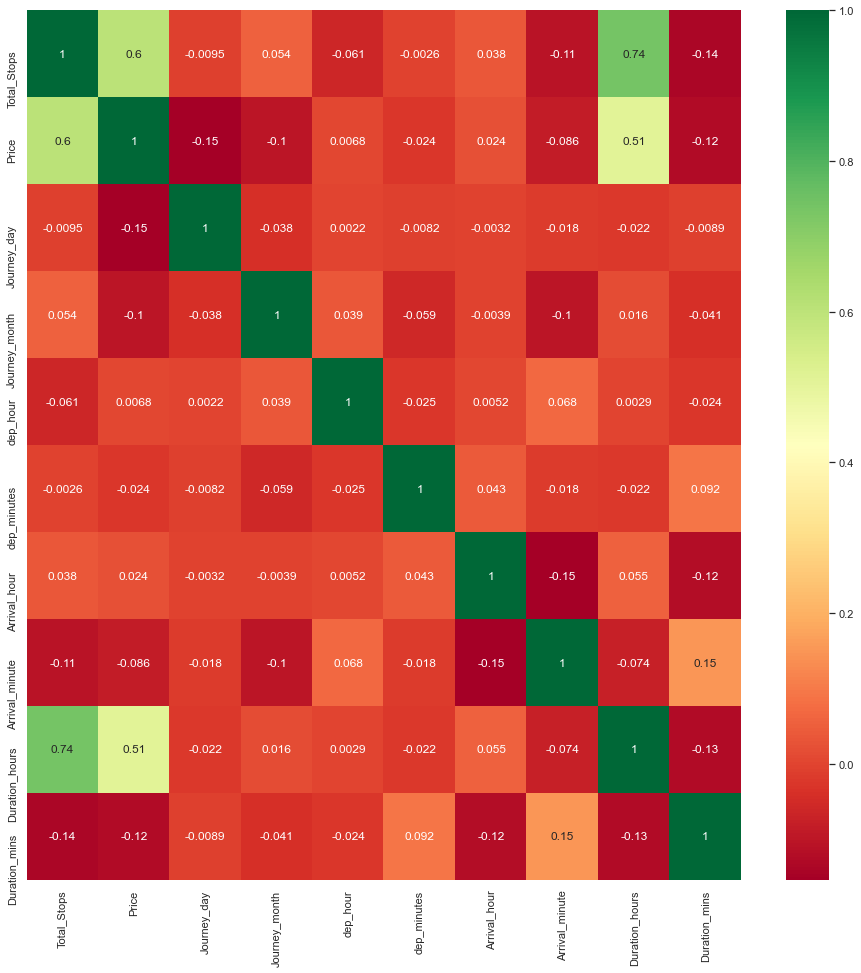

In [50]:
#finding correlation between independent and depaendent features

plt.figure(figsize=(16,16))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [51]:
#feature selection using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[2.28108947e-01 1.44022423e-01 5.38406516e-02 2.43458680e-02
 2.13586358e-02 2.80908775e-02 1.82084070e-02 1.06012180e-01
 1.79058253e-02 1.09160021e-02 1.82540219e-03 1.88218595e-02
 1.47281313e-01 6.75522208e-02 1.88004376e-02 8.48102008e-04
 2.94017560e-03 9.94925413e-05 5.15514728e-03 8.94547067e-05
 4.25136904e-04 9.08635654e-03 3.29481878e-03 6.23164475e-03
 1.53845545e-02 1.59683441e-02 7.88460141e-03 5.08975024e-04
 2.49921464e-02]


Total_Stops                                  0.228109
Journey_day                                  0.144022
Journey_month                                0.053841
dep_hour                                     0.024346
dep_minutes                                  0.021359
Arrival_hour                                 0.028091
Arrival_minute                               0.018208
Duration_hours                               0.106012
Duration_mins                                0.017906
Airline_Air India                            0.010916
Airline_GoAir                                0.001825
Airline_IndiGo                               0.018822
Airline_Jet Airways                          0.147281
Airline_Jet Airways Business                 0.067552
Airline_Multiple carriers                    0.018800
Airline_Multiple carriers Premium economy    0.000848
Airline_SpiceJet                             0.002940
Airline_Trujet                               0.000099
Airline_Vistara             

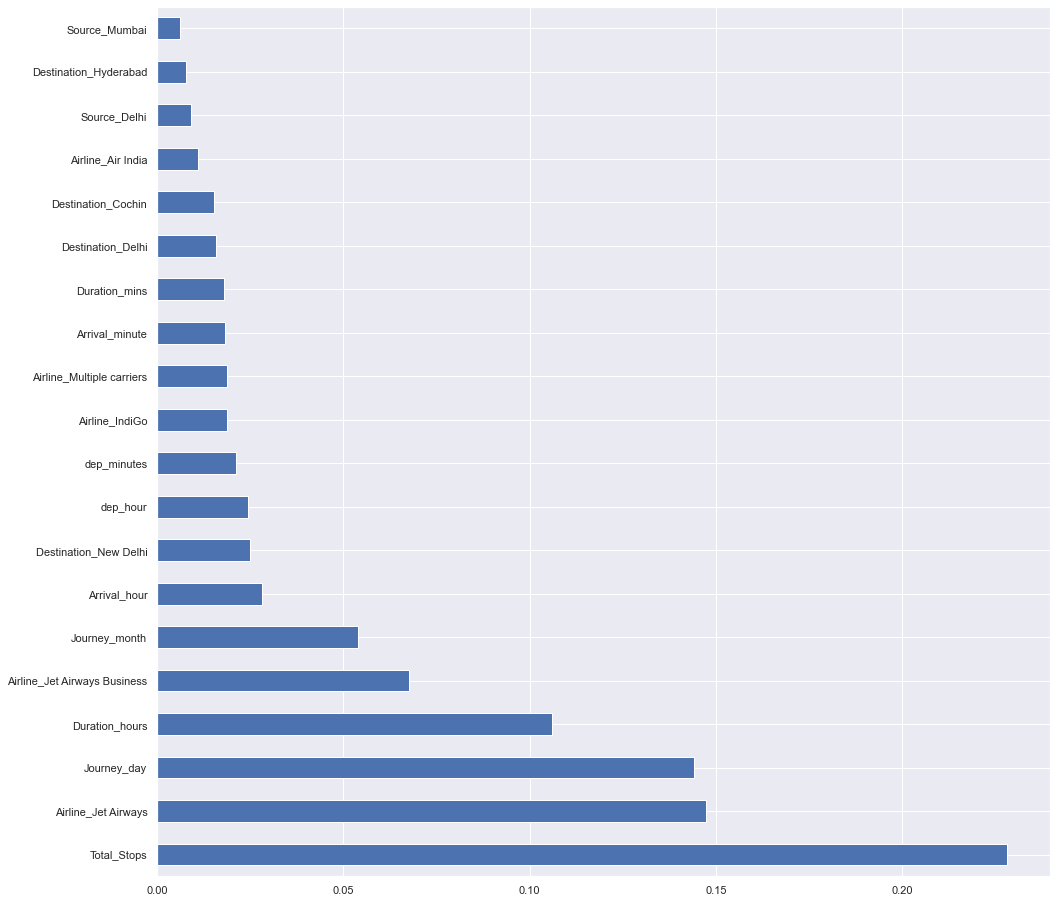

In [55]:
#plotting graph of feature selection for better visualisation

plt.figure(figsize = (16,16))
f_importance = pd.Series(selection.feature_importances_,index=X.columns)
print(f_importance)
f_importance.nlargest(20).plot(kind='barh')
plt.show()

# Building model using Random Forest


In [56]:
#splitting datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
y_pred=rf.predict(X_test)

In [59]:
rf.score(X_train,y_train)

0.9559089250004098

In [60]:
rf.score(X_test,y_test)

0.8187831534008742

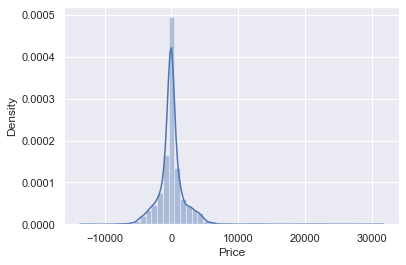

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

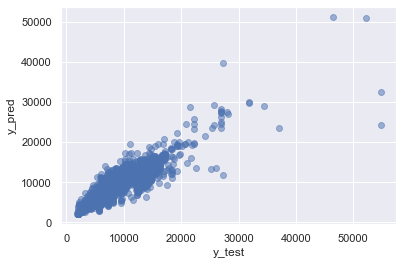

In [66]:
plt.scatter(y_test,y_pred,alpha= 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1207.901366464664
MSE:  4088124.1136383684
RMSE:  2021.9110053705056


In [68]:
metrics.r2_score(y_test,y_pred)

0.8187831534008742

# Hyperparameter tuning


 hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num=12)]
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of sample required to each leaf node
min_samples_leaf = [1,2,5,10]

In [72]:
#creating the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               'min_samples_leaf':min_samples_leaf
}

In [75]:
#Random search of parameters using 5 fold cross validation,
#search accross 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [76]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
prediction = rf_random.predict(X_test)

C:\Users\ckala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


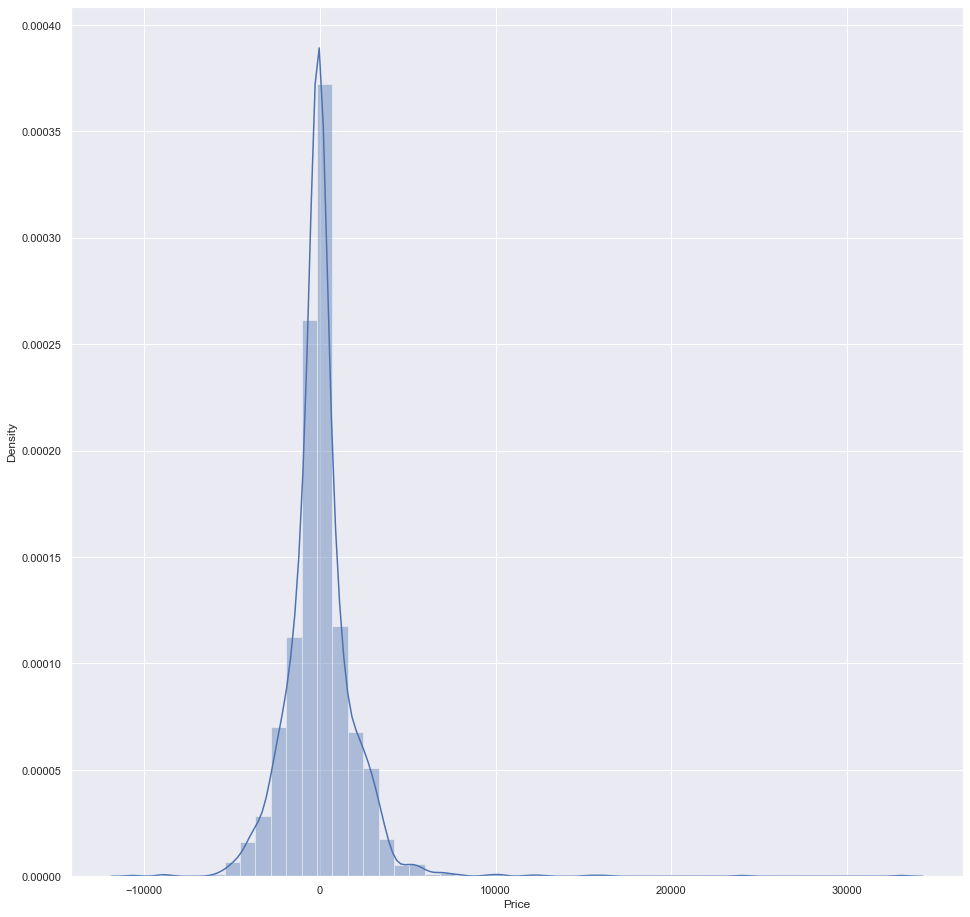

In [79]:
plt.figure(figsize=(16,16))
sns.distplot(y_test-prediction)
plt.show()

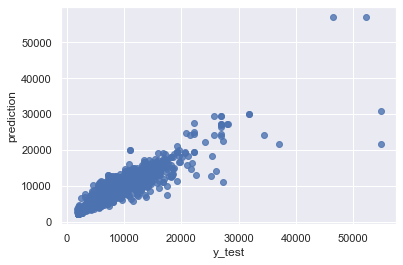

In [81]:
plt.scatter(y_test,prediction,alpha= 0.8)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [82]:
print("MAE: ", metrics.mean_absolute_error(y_test,prediction))
print("MSE: ", metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1186.1047044730715
MSE:  3789898.0153237004
RMSE:  1946.7660402122542


## save the model to reuse it again

In [83]:
import pickle

#open a file, where you want to store the data

file = open('flight_rf.pkl','wb')

#dump information to that file

pickle.dump(rf,file)

In [85]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [86]:
y_prediction = forest.predict(X_test)

In [87]:
metrics.r2_score(y_test,y_prediction)

0.8187831534008742